In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from IPython.display import display, Math

In [973]:
np.set_printoptions(suppress=True)

In [974]:
PRECISION = 5

k_ = 8
p_ = 0.7
n_ = 140

# k_ = 3
# p_ = 0.5
# n_ = 160

# k_ = 10
# p_ = 0.4
# n_ = 120

alpha_ = 0.01

In [ ]:
factorial = lambda x : sp.special.factorial(x)
Cnk       = lambda n, k : \
                factorial(n) / (factorial(k) * (factorial(n - k)))
cout      = lambda name, arr : \
                print(f'{name}:\n {np.round(np.array(arr), PRECISION)}')

In [976]:
def decorate_plot(ax, xticks, loc=(-0.025, -0.3)):
    # Define font sizes
    SIZE_TICKS = 10

    # axis names
    ax.set_xlabel('p')

    ax.set_xticks(xticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    # plt.legend(fontsize=10, loc='lower left')
    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [977]:
def B(k, p, n):
    q = 1 - p
    P = [Cnk(k, j) * p**j * (q)**(k - j) for j in range(k+1)]
    # cout('P', P)

    Cumulative_P = [P[i] + sum(P[:i]) for i in range(k+1)]
    # cout('cumulative P', Cumulative_P)

    Y = np.random.uniform(low=0, high=1, size=n)
    # cout('Y', Y)

    def k_alg(u, r):
        i = 0
        for j in range(len(u)):
            if r < u[j]:
                break
            i += 1
        return i
    X = [k_alg(Cumulative_P, Y[j]) for j in range(n)]
    # cout('X', X)

    return X

X = B(k_, p_, n_)
cout(f'B({k_},{p_}) of size {n_}', X)

B(8,0.7) of size 140:
 [7 6 5 8 4 3 6 7 5 6 4 7 7 6 5 6 6 6 2 6 6 5 5 7 7 6 7 6 7 7 5 4 2 5 5 8 6
 5 7 6 4 6 3 5 6 1 8 6 7 6 7 5 8 6 5 7 5 4 6 8 7 4 5 7 6 6 5 5 6 7 6 7 5 7
 5 6 5 5 7 6 5 5 4 5 7 6 3 4 6 5 4 6 7 7 4 6 3 7 5 5 6 7 4 7 5 5 6 4 6 7 6
 3 5 6 6 5 7 6 6 4 5 7 6 7 5 6 6 4 3 7 4 4 4 5 7 8 5 5 7 5]


In [978]:
overlineX = 1 / len(X) * sum(X)
display(Math(f'\\overline{{X}}: {overlineX}'))

K_Stat = sum(X)
display(Math(f'K(\\overrightarrow{{X}}_n): {K_Stat}'))

quantile = lambda alpha, n, p : sp.stats.binom.ppf(alpha, n, p) # n * k

<IPython.core.display.Math object>

<IPython.core.display.Math object>

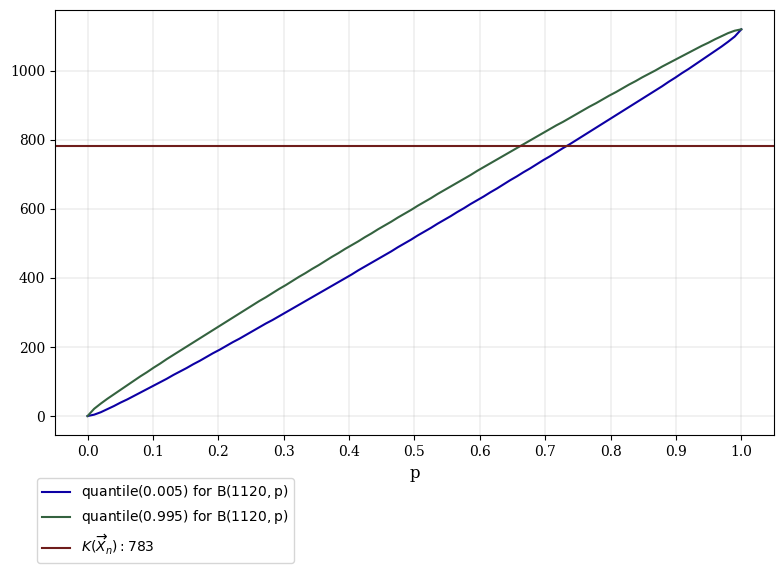

In [ ]:
def plot(filename):
    # Define colors
    RED = '#6F1D1B'
    GREEN = '#34623f'
    BLUE = '#0d00a4'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(8, 6))

    # alpha / 2
    alpha = alpha_ / 2
    x_values = np.linspace(0, 1, 100)
    y_values = [quantile(alpha, n_*k_, p) for p in x_values]
    ax.plot(x_values, 
            y_values, 
            color=BLUE, 
            linestyle='-', 
            linewidth=1.5, 
    label=f'$\\text{{quantile}}({alpha})\\text{{ for B}}({n_*k_}, \\text{{p}})$')

    # 1 - alpha / 2
    alpha = 1 - alpha_ / 2
    x_values = np.linspace(0, 1, 100)
    y_values = [quantile(alpha, n_*k_, p) for p in x_values]
    ax.plot(x_values, 
            y_values, 
            color=GREEN, 
            linestyle='-', 
            linewidth=1.5, 
    label=f'$\\text{{quantile}}({alpha})\\text{{ for B}}({n_*k_}, \\text{{p}})$')

    # Draw the horizontal line y = K_Stat
    ax.axhline(y=K_Stat, 
               color=RED, 
               linestyle='-', 
               label=f'$K(\\overrightarrow{{X}}_n): {K_Stat}$')

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 1+0.1, 0.1))

    plt.grid(linestyle='-', linewidth=0.25)

    # Save the figure
    plt.savefig(f'{filename}.png', dpi=300, transparent=True)


    # Show the plot
    plt.show()

plot('quantiles')

In [999]:
# numerically

alphas_ = [0.1, 0.05, 0.02] + [alpha_] 

for alpha in alphas_:

    foo1 = lambda p : quantile(1 - alpha / 2, n_*k_, p) - K_Stat
    foo2 = lambda p : quantile(alpha/2, n_*k_, p) - K_Stat

    underlineP = sp.optimize.brentq(foo1, 0, 1, xtol=1e-6)
    overlineP  = sp.optimize.brentq(foo2, 0, 1, xtol=1e-6)

    print(f'{alpha}: {np.round(underlineP, PRECISION)}',end=' '*5)
    print(f'{alpha}: {np.round(overlineP, PRECISION)}')

0.1: 0.67664     0.1: 0.72168
0.05: 0.6717     0.05: 0.72545
0.02: 0.66665     0.02: 0.72985
0.01: 0.66343     0.01: 0.7336


In [1000]:
# Klopper-Pirson

for alpha in alphas_:
    underlineP = lambda alpha : \
                    sp.stats.beta.ppf(alpha/2, 
                                      K_Stat, 
                                      n_ * k_ - K_Stat + 1)
    overlineP  = lambda alpha : \
                    sp.stats.beta.ppf(1-alpha/2, 
                                      K_Stat + 1, 
                                      n_ * k_ - K_Stat)

    print(f'{alpha}: {np.round(underlineP(alpha), PRECISION)}',end=' '*5)
    print(f'{alpha}: {np.round(overlineP(alpha), PRECISION)}')

0.1: 0.67575     0.1: 0.72169
0.05: 0.6713     0.05: 0.72586
0.02: 0.66611     0.02: 0.73068
0.01: 0.66256     0.01: 0.73394


In [1002]:
# CPT

def find_p(alpha):
    SE = np.sqrt(overlineX * (k_ - overlineX) / (n_ * k_)) / k_

    quantile = sp.stats.norm.ppf(alpha / 2)

    lowerBound = overlineX / k_ + quantile * SE
    upperBound = overlineX / k_ - quantile * SE

    return (lowerBound, upperBound)

for alpha in alphas_:
    underlineP, overlineP = find_p(alpha)
    print(f'{alpha}: {np.round(underlineP, PRECISION)}',end=' '*5)
    print(f'{alpha}: {np.round(overlineP, PRECISION)}')

0.1: 0.67656     0.1: 0.72165
0.05: 0.67225     0.05: 0.72597
0.02: 0.66723     0.02: 0.73099
0.01: 0.66381     0.01: 0.73441


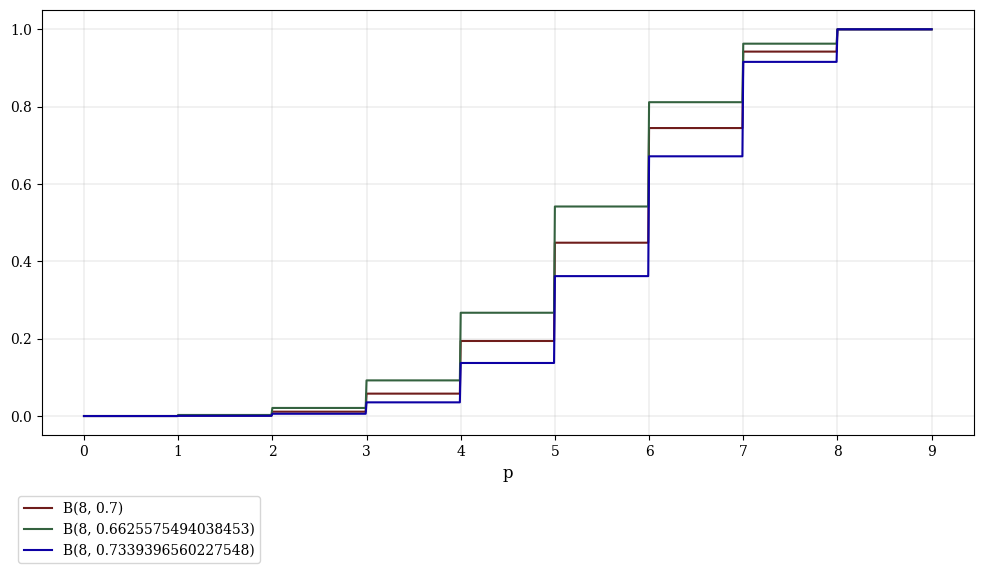

In [ ]:
def plot(filename):
    # Define colors
    RED = '#6F1D1B'
    GREEN = '#34623f'
    BLUE = '#0d00a4'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    underlineP = lambda alpha : \
                    sp.stats.beta.ppf(alpha/2,   
                                      K_Stat,     
                                      n_ * k_ - K_Stat + 1)
    overlineP  = lambda alpha : \
                    sp.stats.beta.ppf(1-alpha/2, 
                                      K_Stat + 1, 
                                      n_ * k_ - K_Stat)

    x_values = np.linspace(0, k_+1, 1000)
    
    # B(k, p)
    y_values = sp.stats.binom.cdf(x_values, k_, p_)
    ax.plot(x_values, 
            y_values, 
            color=RED, 
            linestyle='-', 
            linewidth=1.5, 
            label=f'B({k_}, {p_})')
    
    # B(k, underline p)
    p = underlineP(alpha_)
    y_values = sp.stats.binom.cdf(x_values, k_, p)
    ax.plot(x_values, 
            y_values, 
            color=GREEN, 
            linestyle='-', 
            linewidth=1.5, 
            label=f'B({k_}, {p})')

    # B(k, overline p)
    p = overlineP(alpha_)
    y_values = sp.stats.binom.cdf(x_values, k_, p)
    ax.plot(x_values, 
            y_values, 
            color=BLUE, 
            linestyle='-', 
            linewidth=1.5, 
            label=f'B({k_}, {p})')

    # Call the decoration function
    decorate_plot(ax, np.linspace(0, k_+1, 10))

    plt.grid(linestyle='-', linewidth=0.25)

    # Save the figure
    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

plot('B_step')